<a href="https://www.kaggle.com/code/yeettothemax/customer-cost-regression-forward-selection?scriptVersionId=139900950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/medias-cost-prediction-in-foodmart/media prediction and its cost.csv')
data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [4]:
data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

/tmp/ipykernel_20/2168932467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr() #correlation matrix


(23.5, -0.5)

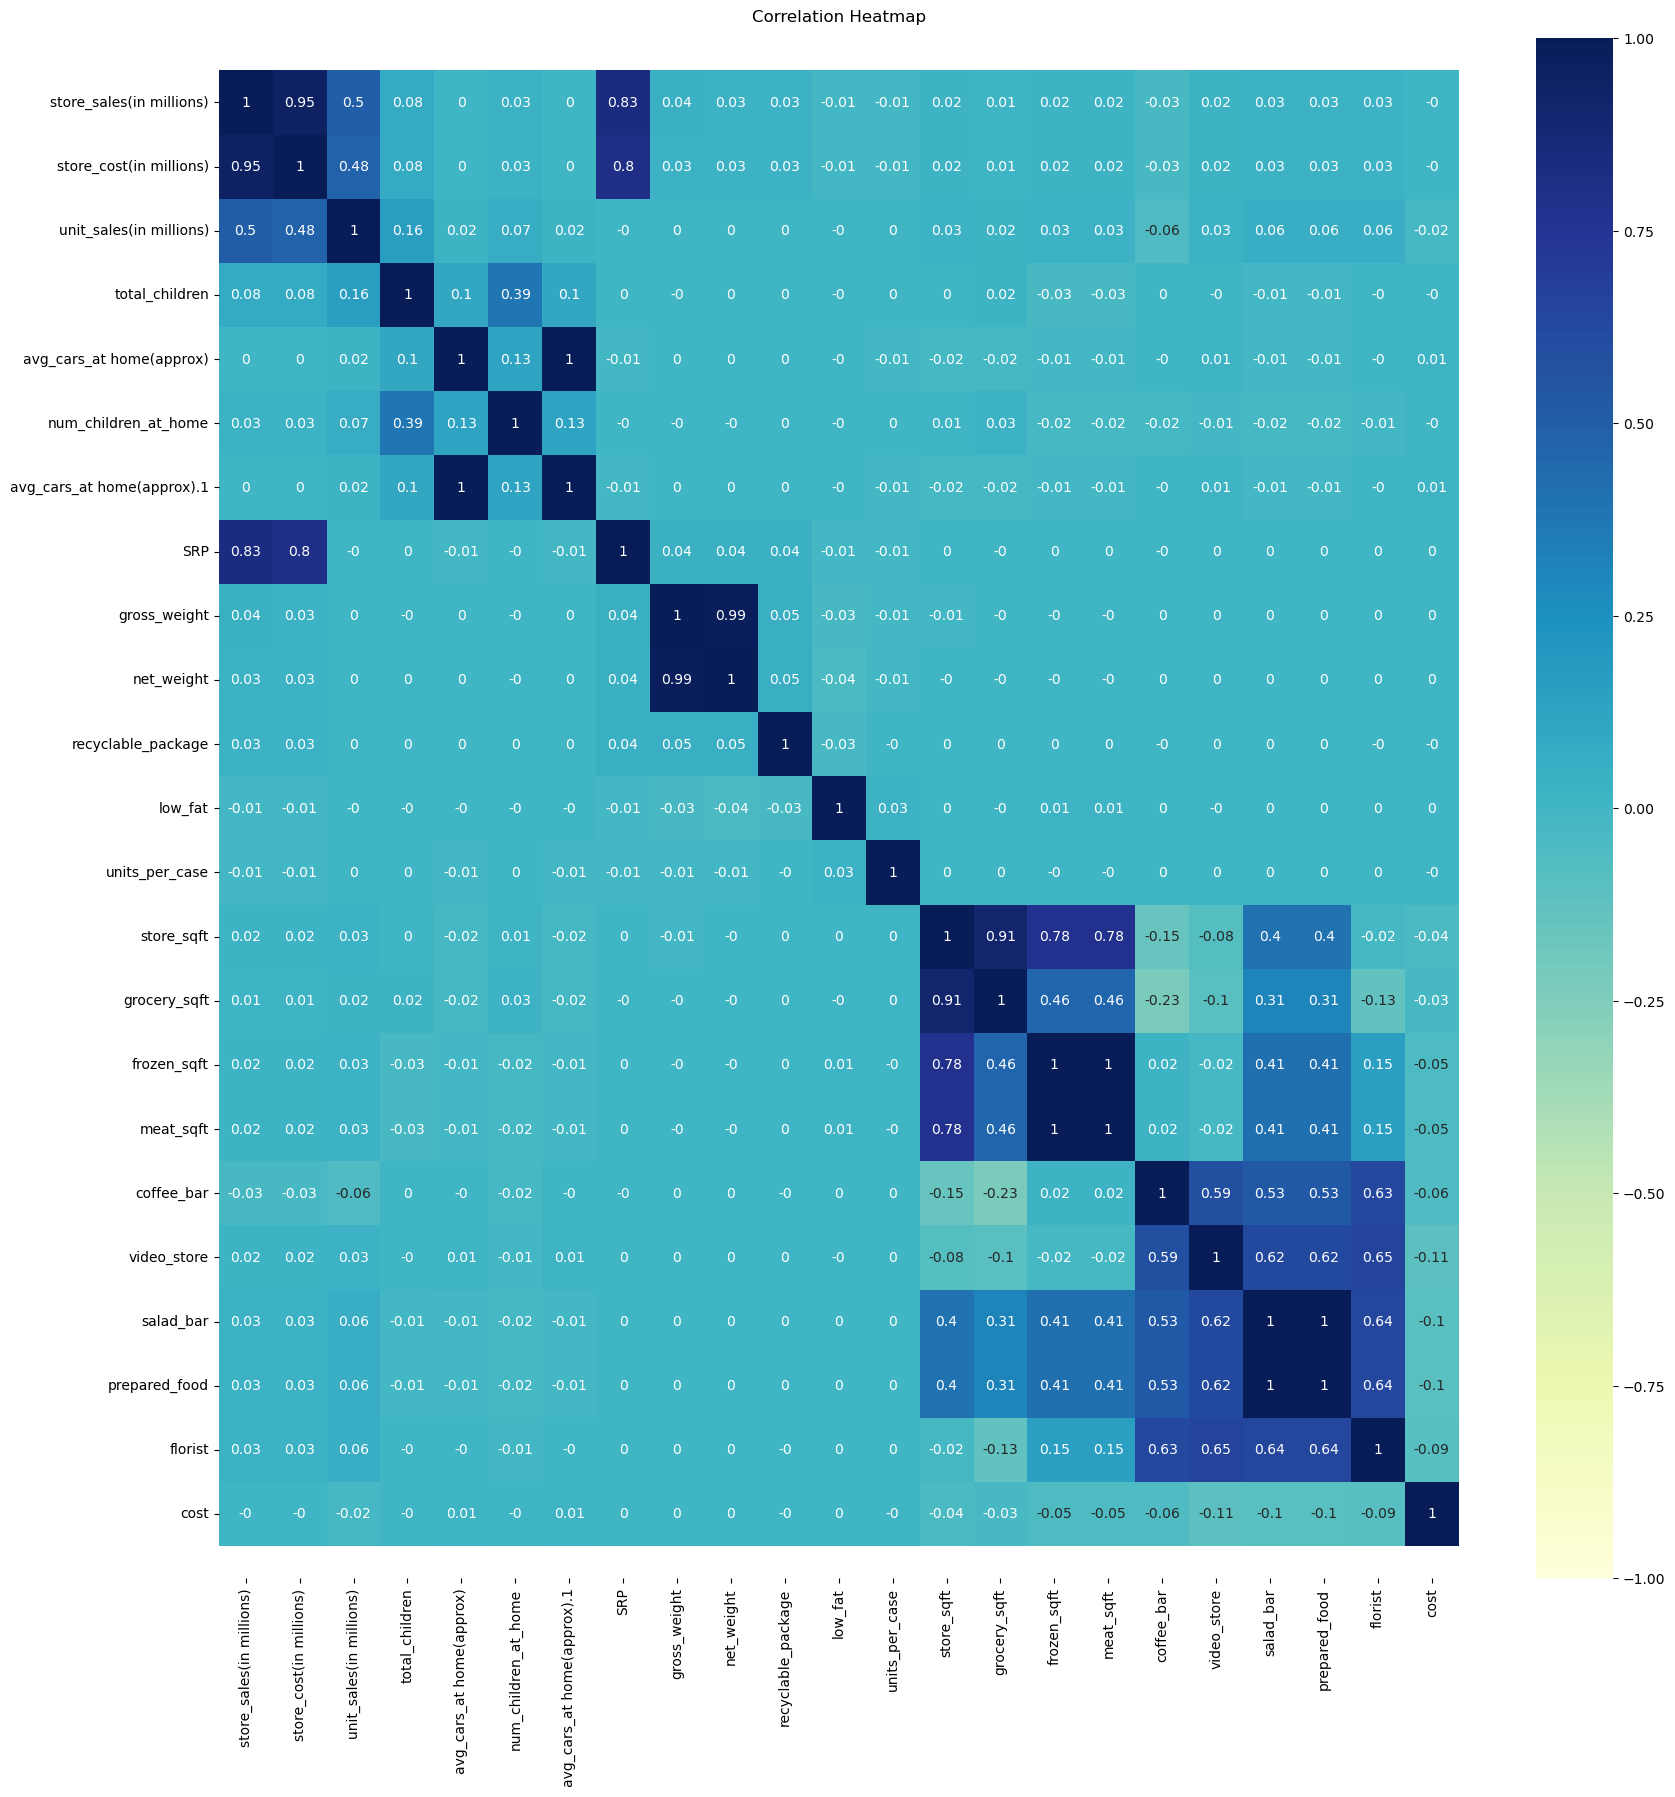

In [5]:
data_corr = data.corr() #correlation matrix
plt.figure(figsize=(20, 20)) #initialize figure
heatmap = sns.heatmap(data_corr.round(2), vmin=-1, vmax=1,cmap = "YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#better display of heatmap
bottom, top = heatmap.get_ylim() 
heatmap.set_ylim(bottom + 0.5, top - 0.5)

Drop high correlated features.(ρ>0.7). 

In [6]:
data1 = data.drop(['meat_sqft','frozen_sqft','salad_bar','prepared_food','grocery_sqft',
                   'gender','store_sales(in millions)','avg_cars_at home(approx)','avg_cars_at home(approx).1'],axis=1)
data1
#'store_cost(in millions)'

,food_category,food_department,food_family,store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,total_children,education,...,units_per_case,store_type,store_city,store_state,store_sqft,coffee_bar,video_store,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,2.7232,4.0,Bag Stuffers,USA,M,1.0,Partial High School,...,17.0,Deluxe Supermarket,Salem,OR,27694.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,2.5944,3.0,Cash Register Lottery,USA,M,0.0,Bachelors Degree,...,17.0,Deluxe Supermarket,Salem,OR,27694.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,1.3616,2.0,High Roller Savings,USA,S,4.0,Partial High School,...,17.0,Deluxe Supermarket,Salem,OR,27694.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,1.1776,2.0,Cash Register Lottery,USA,M,2.0,High School Degree,...,17.0,Deluxe Supermarket,Salem,OR,27694.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,1.4280,3.0,Double Down Sale,USA,M,0.0,Partial High School,...,29.0,Deluxe Supermarket,Salem,OR,27694.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,1.3248,1.0,You Save Days,USA,M,1.0,Partial High School,...,26.0,Small Grocery,San Francisco,CA,22478.0,1.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,0.4960,1.0,Price Cutters,USA,S,2.0,High School Degree,...,36.0,Small Grocery,San Francisco,CA,22478.0,1.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,2.5392,2.0,Weekend Markdown,USA,M,1.0,High School Degree,...,26.0,Small Grocery,San Francisco,CA,22478.0,1.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,2.5668,3.0,Sales Days,Canada,S,2.0,Bachelors Degree,...,26.0,Mid-Size Grocery,Victoria,BC,34452.0,1.0,0.0,1.0,Sunday Paper,132.88


/tmp/ipykernel_20/3571916691.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # the layout of each xticks appear better


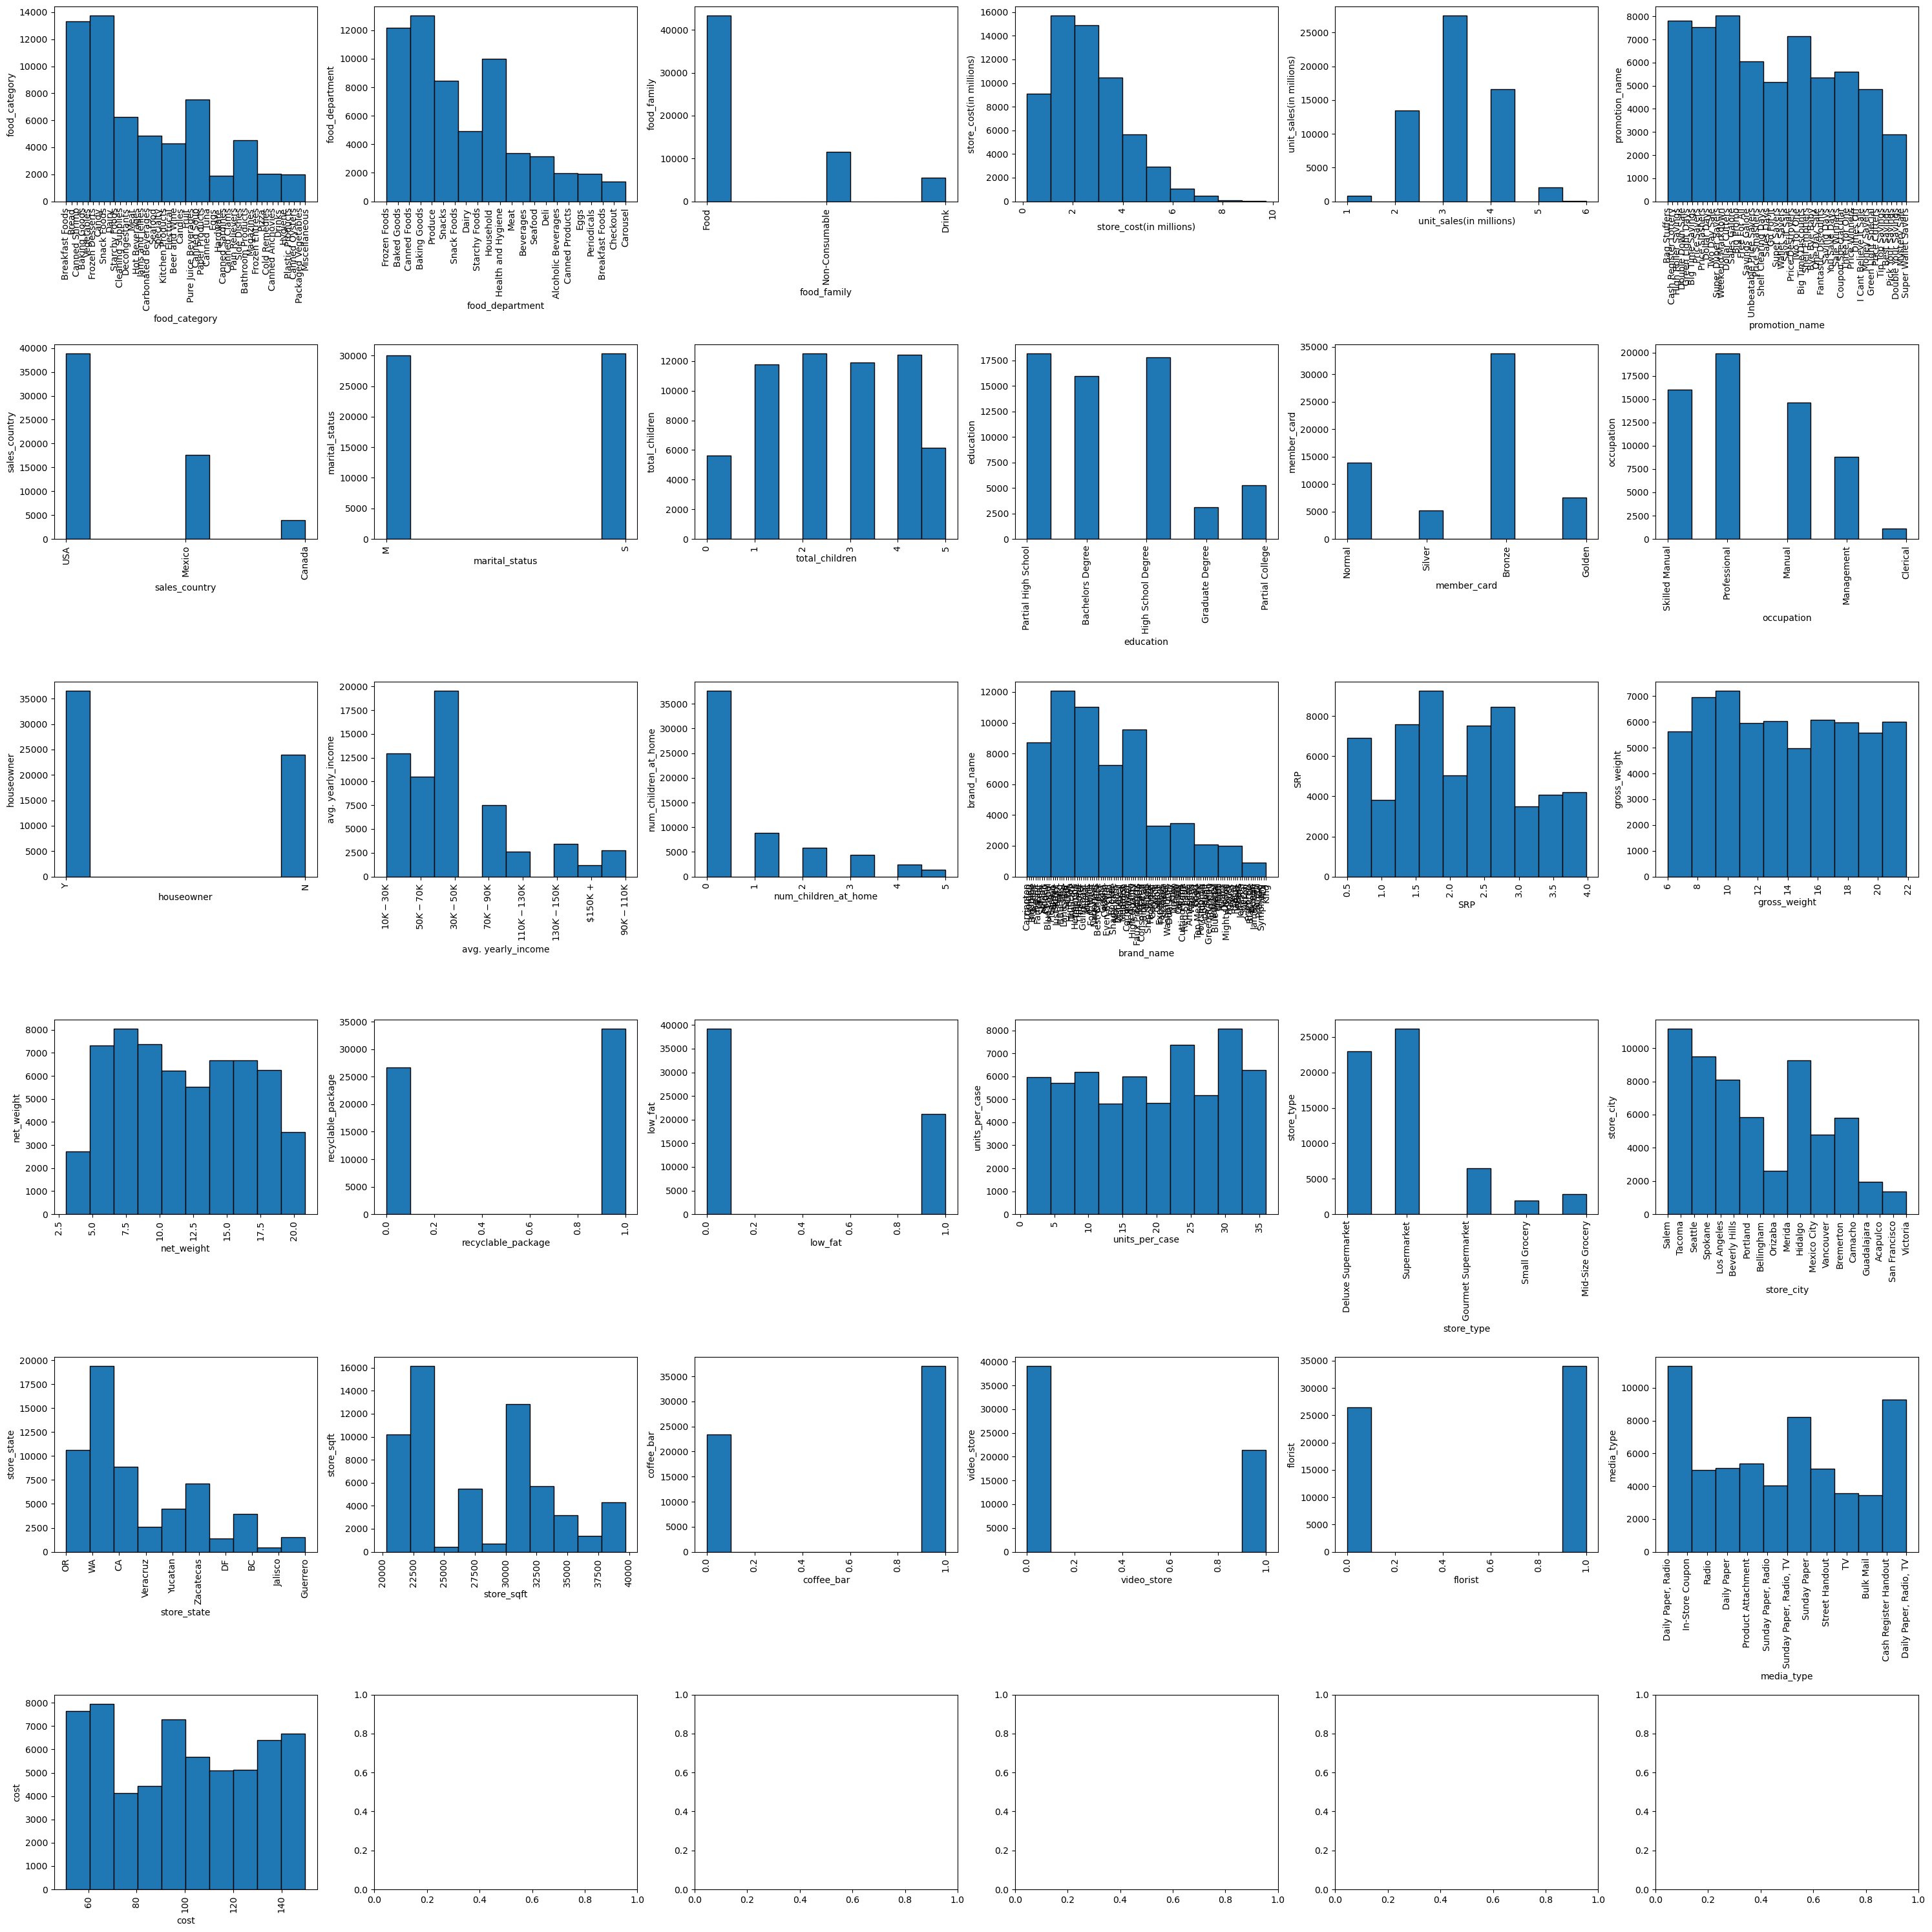

In [7]:
plt.subplots(nrows=6,ncols=6,figsize = (30,30))
for i in range(31):
    plt.subplot(6,6,i+1)
    plt.hist(data1.iloc[:,i],edgecolor='black')
    plt.xlabel(data1.columns[i])
    plt.ylabel(data1.columns[i])
    plt.xticks(rotation=90)  #rotate x axis labels
    plt.tight_layout() # the layout of each xticks appear better

### ***Forward Feature Selection***

In [8]:
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [9]:
#label encode categorical values of df
encoder = LabelEncoder()

for column in data1.columns:
    if data1[column].dtype == 'object':  
        data1[column] = encoder.fit_transform(data[column])

# Display the encoded DataFrame
data1

,food_category,food_department,food_family,store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,total_children,education,...,units_per_case,store_type,store_city,store_state,store_sqft,coffee_bar,video_store,florist,media_type,cost
0,4,12,1,2.7232,4.0,0,2,0,1.0,4,...,17.0,0,12,5,27694.0,1.0,1.0,1.0,3,126.62
1,4,12,1,2.5944,3.0,6,2,0,0.0,0,...,17.0,0,12,5,27694.0,1.0,1.0,1.0,3,59.86
2,4,12,1,1.3616,2.0,18,2,1,4.0,4,...,17.0,0,12,5,27694.0,1.0,1.0,1.0,3,84.16
3,4,12,1,1.1776,2.0,6,2,0,2.0,2,...,17.0,0,12,5,27694.0,1.0,1.0,1.0,5,95.78
4,4,12,1,1.4280,3.0,11,2,0,0.0,4,...,29.0,0,12,5,27694.0,1.0,1.0,1.0,7,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,1.3248,1.0,48,2,0,1.0,4,...,26.0,3,13,1,22478.0,1.0,0.0,0.0,5,95.25
60424,42,7,2,0.4960,1.0,24,2,1,2.0,2,...,36.0,3,13,1,22478.0,1.0,0.0,0.0,9,69.42
60425,42,7,2,2.5392,2.0,47,2,0,1.0,2,...,26.0,3,13,1,22478.0,1.0,0.0,0.0,11,67.51
60426,42,7,2,2.5668,3.0,31,0,1,2.0,0,...,26.0,2,18,0,34452.0,1.0,0.0,1.0,9,132.88


In [10]:
#drop target 'cost'
target = data1['cost']

data2 = data1.drop(['cost'],axis=1)

In [11]:
#train test split
x_train,x_test, y_train, y_test = train_test_split(data2,target ,test_size =0.3 )

In [12]:
clf = DecisionTreeRegressor()

# Build step forward feature selection
sfs1 = sfs(clf,
           direction= 'forward',
           scoring='r2',
           n_features_to_select=10,
           tol = 1e-1,
           cv=5)

# Perform FFS
sfs1 = sfs1.fit(x_train, y_train)
print(sfs1.feature_names_in_)

['food_category' 'food_department' 'food_family' 'store_cost(in millions)'
 'unit_sales(in millions)' 'promotion_name' 'sales_country'
 'marital_status' 'total_children' 'education' 'member_card' 'occupation'
 'houseowner' 'avg. yearly_income' 'num_children_at_home' 'brand_name'
 'SRP' 'gross_weight' 'net_weight' 'recyclable_package' 'low_fat'
 'units_per_case' 'store_type' 'store_city' 'store_state' 'store_sqft'
 'coffee_bar' 'video_store' 'florist' 'media_type']


In [13]:
len(sfs1.feature_names_in_)

30

From forward feature selection we keep all the features.

In [14]:
#attempt for manual sfs using AIC 
'''
def forward_selection(X_train, y_train, initial_features=[]):
    included_features = list(initial_features)
    remaining_features = list(X_train.columns)
    
    while remaining_features:
        best_feature = None
        best_model = None
        best_aic = np.inf
        
        for feature in remaining_features:
            model_features = included_features + [feature]
            X_train_selected = X_train[model_features]
            X_train_selected = sm.add_constant(X_train_selected)  
            model = sm.OLS(y_train, X_train_selected).fit()
            aic = model.aic
            
            if aic < best_aic:
                best_aic = aic
                best_feature = feature
                best_model = model
                included_features.append(best_feature)
                remaining_features.remove(best_feature)
                print(f"Selected feature: {best_feature}, AIC: {best_aic:.4f}")
        break
    
    return best_model, included_features

fs_model, best_features = forward_selection(x_train,y_train)
print('Features selected:',*best_features, sep = ' ')

#keep best features
x_train = x_train.drop(columns=[col for col in x_train.columns if col not in best_features])
x_test = x_test.drop(columns=[col for col in x_test.columns if col not in best_features])
'''

'\ndef forward_selection(X_train, y_train, initial_features=[]):\n    included_features = list(initial_features)\n    remaining_features = list(X_train.columns)\n    \n    while remaining_features:\n        best_feature = None\n        best_model = None\n        best_aic = np.inf\n        \n        for feature in remaining_features:\n            model_features = included_features + [feature]\n            X_train_selected = X_train[model_features]\n            X_train_selected = sm.add_constant(X_train_selected)  \n            model = sm.OLS(y_train, X_train_selected).fit()\n            aic = model.aic\n            \n            if aic < best_aic:\n                best_aic = aic\n                best_feature = feature\n                best_model = model\n                included_features.append(best_feature)\n                remaining_features.remove(best_feature)\n                print(f"Selected feature: {best_feature}, AIC: {best_aic:.4f}")\n        break\n    \n    return best_model

In [15]:
model = DecisionTreeRegressor()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1.9980473054222516
R-squared: 0.9977883999550291


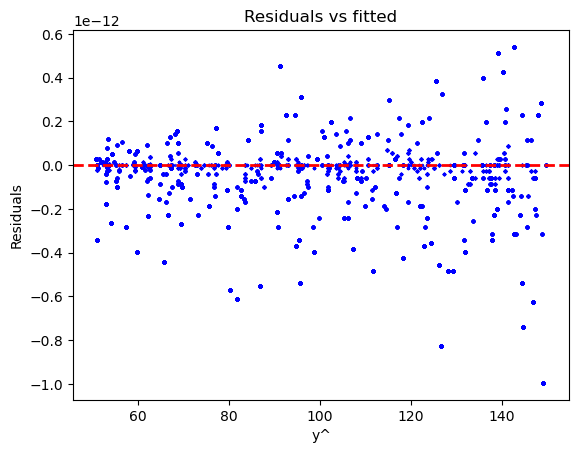

In [16]:
#residuals vs fitted
y_hat = model.predict(x_train)
residuals = y_train - y_hat

# Plot the residuals vs. fitted values
plt.scatter(y_hat, residuals, color='blue',s =2, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs fitted')
plt.xlabel('y^')
plt.ylabel('Residuals')
plt.show()